In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os

path_root = os.environ.get('DECIDENET_PATH')
path_code = os.path.join(path_root, 'code')
if path_code not in sys.path:
    sys.path.append(path_code)
from dn_utils.glm_utils import convolve, Regressor, upsampled_events
from dn_utils.plotting import aligned_imshow_cbar

%matplotlib inline

/home/kmb/Desktop/Neuroscience/Projects/BONNA_decide_net/code/dn_utils/glm_utils.py:13: FutureWarning: 

 | Starting with Nilearn 0.7.0, all Nistats functionality has been incorporated into Nilearn's stats & reporting modules.
 | Nistats package will no longer be updated or maintained.

  from nistats import design_matrix


In [2]:
t_r = 2
n_volumes = 10
sampling_rate = 1/16
events_onset = [2, 4]

frame_times = np.arange(n_volumes) * t_r
frame_times_upsampled = np.arange(n_volumes / sampling_rate) * t_r * sampling_rate
downsamples = slice(1, int(n_volumes / sampling_rate), int(1 / sampling_rate))

In [5]:
event_psycho_range = np.linspace(0, 2, 9)
event_ppi_range = np.linspace(0, 4, 17)

similarity = np.zeros((len(event_psycho_range), len(event_ppi_range)))

for i, t_event_psycho in enumerate(event_psycho_range):
    for j, t_event_ppi in enumerate(event_ppi_range):

        reg_regular = Regressor(
            name='regular', 
            frame_times=frame_times,
            duration=[t_event_psycho, t_event_psycho], 
            modulation=[-1, 1],
            onset=events_onset)

        events_upsampled = upsampled_events(
            t_r=t_r,
            n_volumes=n_volumes,
            onset=events_onset,
            duration=t_event_ppi,
            modulation=[-1, 1],
            sampling_rate=sampling_rate
        )

        reg_upsampled = Regressor.from_values(
            'upsampled',
            frame_times,
            values=convolve(events_upsampled, t_r=t_r*sampling_rate)[downsamples]
        )

        similarity[i, j] = Regressor.corr(reg_regular, reg_upsampled)

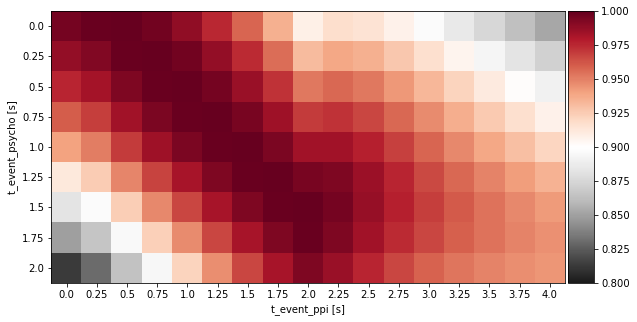

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

im = ax.imshow(similarity)
aligned_imshow_cbar(ax, im)

ax.set_xticks(np.arange(0, len(event_ppi_range), 1))
ax.set_yticks(np.arange(0, len(event_psycho_range), 1))
ax.set_xticklabels(event_ppi_range)
ax.set_yticklabels(event_psycho_range)
ax.set_xlabel('t_event_ppi [s]')
ax.set_ylabel('t_event_psycho [s]')
im.set_clim([0.8, 1])
im.set_cmap('RdGy_r')